### Setup

In [1]:
# install if not yet done
using Pkg

# Pkg.add(url="https://github.com/mppmu/BoostFractor.jl.git")
# Pkg.add(url="https://github.com/bergermann/Dragoon.jl.git")
Pkg.update()

    Updating registry at `C:\Users\bergermann\.julia\registries\General.toml`
    Updating git-repo `https://github.com/mppmu/BoostFractor.jl.git`
    Updating git-repo `https://github.com/bergermann/Dragoon.jl.git`
   Installed Expat_jll ─ v2.6.4+0
   Installed XML2_jll ── v2.13.5+0
  No Changes to `C:\Users\bergermann\.julia\environments\v1.11\Project.toml`
    Updating `C:\Users\bergermann\.julia\environments\v1.11\Manifest.toml`
  [2e619515] ↑ Expat_jll v2.6.2+0 ⇒ v2.6.4+0
  [02c8fc9c] ↑ XML2_jll v2.13.4+0 ⇒ v2.13.5+0
Precompiling project...
   1686.7 ms  ✓ Expat_jll
   1337.3 ms  ✓ XML2_jll
   1716.6 ms  ✓ Fontconfig_jll
   1478.8 ms  ✓ Gettext_jll
   1576.4 ms  ✓ XSLT_jll
   1498.7 ms  ✓ Glib_jll
   1934.4 ms  ✓ Cairo_jll
   2398.9 ms  ✓ Qt6Base_jll
   1766.2 ms  ✓ HarfBuzz_jll
   2365.4 ms  ✓ Qt6ShaderTools_jll
   1702.5 ms  ✓ libass_jll
   1727.6 ms  ✓ Pango_jll
   2933.6 ms  ✓ Qt6Declarative_jll
   2520.8 ms  ✓ FFMPEG_jll
   1921.8 ms  ✓ FFMPEG
   2466.2 ms  ✓ GR_jll
   5462.5

In [2]:
using Dragoon
using Plots

In [3]:
n = 20 # number of discs in the booster

initdist = findpeak1d(22.025e9,n) # initial disc configuration

freqs = genFreqs(22.025e9,50e6; n=50) # optimize on these frequencies
freqsplot = genFreqs(22.025e9,150e6; n=1000) # plot with these frequencies

booster = AnalyticalBooster(initdist; ndisk=n)  # physical properties of the booster
booster.wavelength = λ(22.025e9)

hist = initHist(booster,10000,freqs,ObjAnalytical);

### Optimizer

In [4]:
trace = adam(booster,hist,freqs,
        1e-6,0.9,0.999,1e-3,
        ObjAnalytical,
        Derivator1(1e-6,"double"),
        UnstuckDont;
        ϵgrad=0.0,
        maxiter=Int(1e3),
        showtrace=true,
        showevery=Int(1e2),
        resettimer=true,
        returntimes=false);

Gradient norm: 2.38e7
Iter: 100, timestamp: 1 minute, 2 seconds
Iter finished. Objective value: -3328.77

Gradient norm: 3.8e8
Iter: 200, timestamp: 2 minutes, 4 seconds
Iter finished. Objective value: -13704.691

Gradient norm: 1.33e8
Iter: 300, timestamp: 3 minutes, 6 seconds
Iter finished. Objective value: -14029.455

Gradient norm: 6.21e7
Iter: 400, timestamp: 4 minutes, 7 seconds
Iter finished. Objective value: -14320.79

Gradient norm: 3.66e7
Iter: 500, timestamp: 5 minutes, 9 seconds
Iter finished. Objective value: -14575.629

Gradient norm: 2.24e7
Iter: 600, timestamp: 6 minutes, 10 seconds
Iter finished. Objective value: -14678.865

Gradient norm: 6.28e6
Iter: 700, timestamp: 7 minutes, 12 seconds
Iter finished. Objective value: -14765.406

Gradient norm: 4.66e7
Iter: 800, timestamp: 8 minutes, 13 seconds
Iter finished. Objective value: -14766.382

Gradient norm: 1.52e8
Iter: 900, timestamp: 9 minutes, 14 seconds
Iter finished. Objective value: -14698.993

Gradient norm: 5.93e

In [ ]:
# obtain result, booster is now in optimized position
pos2dist(booster.pos)     #in distance space
# booster.pos               #in position space

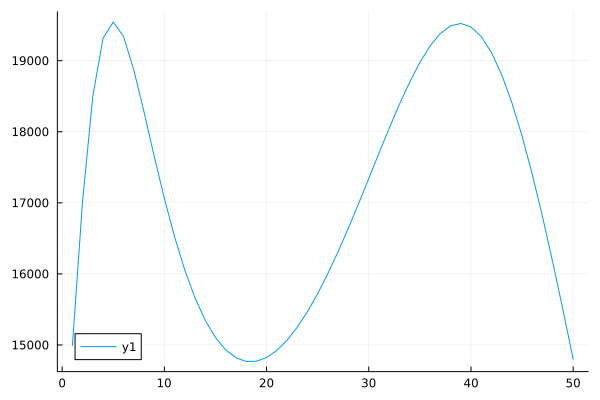

In [5]:
plot(getBoost1d(booster,freqs))

In [7]:
booster.timestamp

0000-01-01T00:10:15.786

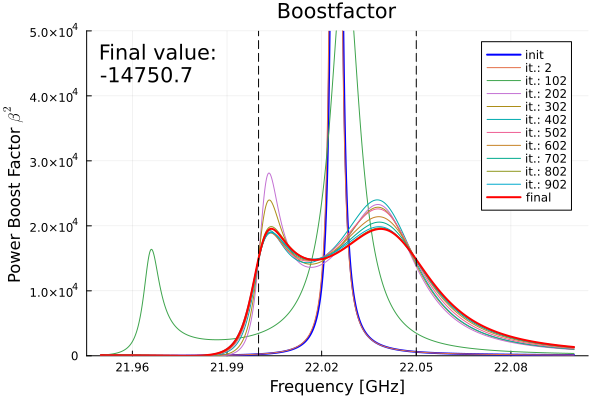

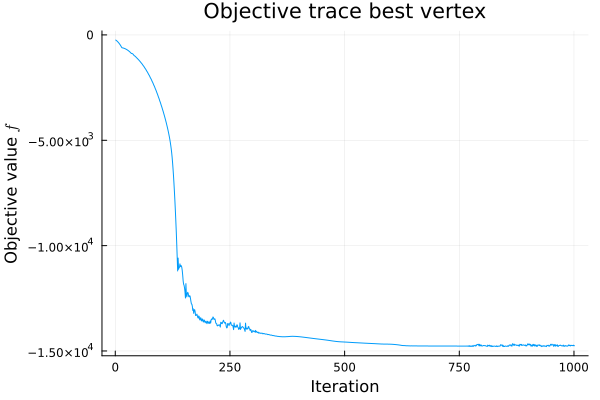

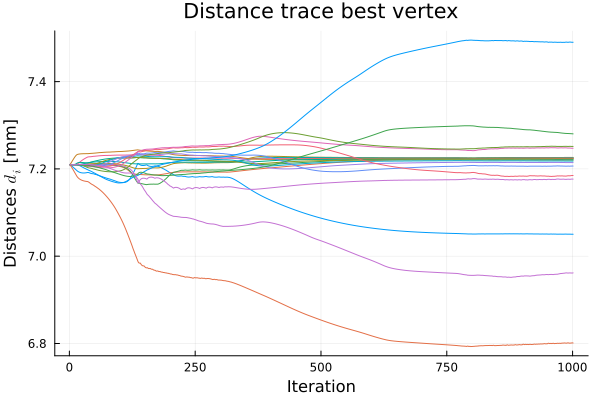

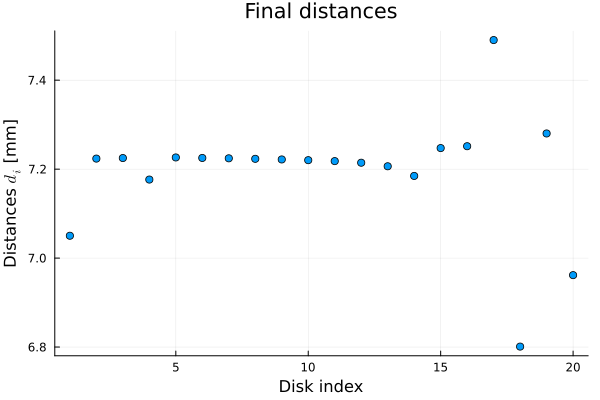

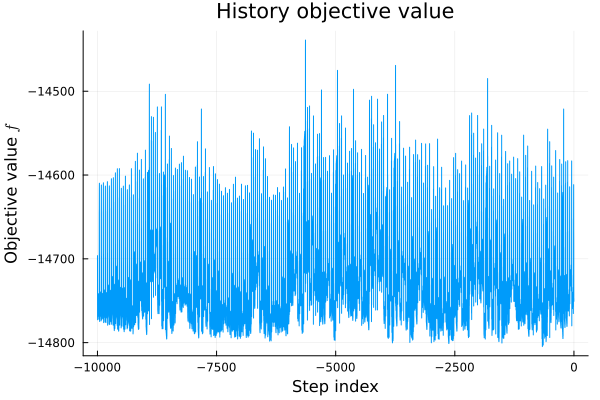

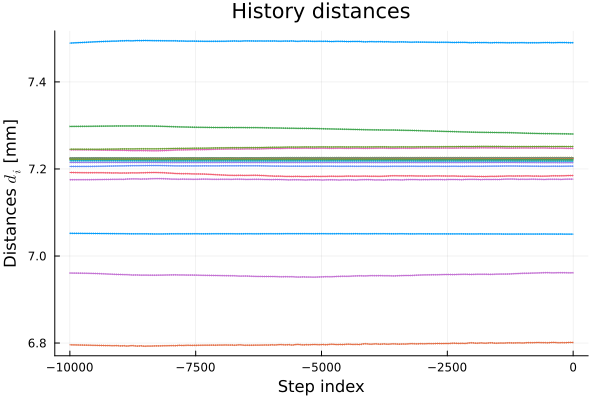

(Plot{Plots.GRBackend() n=13}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=20}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=20})

In [6]:
# get handy output
plt = analyse(booster,hist,trace,freqsplot; freqs=freqs,div=10,ylim=[0,50e3])

# savefig(plt[i],"cool_epic_result_wow.svg")